We will use baysian, IterSVD, Matrix Factorization, Soft impute 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
import numpy as np

from sklearn.model_selection import train_test_split
from fancyimpute import IterativeSVD, SoftImpute

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


In [3]:
missing_data = dataset.isna().sum().sort_values()
missing_data

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
HipsSumAveragebaseline         1
MMSE0m                         3
ERCsASMbaseline                4
HipsSumVariancebaseline        7
HipsVariancebaseline           8
ERCsEntropybaseline            9
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       13
ERCsVariancebaseline          14
HipsContrastbaseline          14
ERCsVolumebaseline            14
ERCsContrastbaseline          18
HipsClusterShadebaseline      18
HipposcampusVolumebaseline    19
HipsCorelationbaseline        20
HipsEntropybaseline           23
HipsASMbaseline               25
ERCsCorelationbaseline        28
ERCsClusterShadebaseline      34
ERCs_thicknessbaseline        37
dtype: int64

In [4]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Diagnosis", axis=1),  
    dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=42,  
)

X_combined = pd.concat([X_train, X_test], axis=0)

In [5]:
# Initialize IterativeSVD for imputation
iterative_svd = IterativeSVD()
softimpute = SoftImpute()

# Perform IterativeSVD Imputation on the combined dataset
X_combined_imputed_iterative = iterative_svd.fit_transform(X_combined)
X_train_imputed_iterative = X_combined_imputed_iterative[:len(X_train), :]
X_test_imputed_iterative = X_combined_imputed_iterative[len(X_train):, :]

# Perform SoftImpute on the combined dataset
X_combined_imputed_soft = softimpute.fit_transform(X_combined)
X_train_imputed_soft = X_combined_imputed_soft[:len(X_train), :]
X_test_imputed_soft = X_combined_imputed_soft[len(X_train):, :]

[IterativeSVD] Iter 1: observed MAE=290.522514
[IterativeSVD] Iter 2: observed MAE=197.616056
[IterativeSVD] Iter 3: observed MAE=28.356853
[IterativeSVD] Iter 4: observed MAE=1.697254
[IterativeSVD] Iter 5: observed MAE=0.503289
[SoftImpute] Max Singular Value of X_init = 403977.444542
[SoftImpute] Iter 1: observed MAE=72.138084 rank=5
[SoftImpute] Iter 2: observed MAE=72.589102 rank=5
[SoftImpute] Iter 3: observed MAE=71.705811 rank=4
[SoftImpute] Iter 4: observed MAE=71.252901 rank=4
[SoftImpute] Iter 5: observed MAE=71.013974 rank=4
[SoftImpute] Iter 6: observed MAE=70.906418 rank=4
[SoftImpute] Iter 7: observed MAE=70.862595 rank=4
[SoftImpute] Iter 8: observed MAE=70.841562 rank=4
[SoftImpute] Iter 9: observed MAE=70.832763 rank=4
[SoftImpute] Iter 10: observed MAE=70.830568 rank=4
[SoftImpute] Iter 11: observed MAE=70.832055 rank=4
[SoftImpute] Iter 12: observed MAE=70.835160 rank=4
[SoftImpute] Iter 13: observed MAE=70.838895 rank=4
[SoftImpute] Iter 14: observed MAE=70.842834 

In [6]:
X_train_imputed_svd = pd.DataFrame(X_train_imputed_iterative, columns=X_train.columns)
X_test_imputed_svd = pd.DataFrame(X_test_imputed_iterative, columns=X_test.columns)

X_train_imputed_sm = pd.DataFrame(X_train_imputed_soft, columns=X_train.columns)
X_test_imputed_sm = pd.DataFrame(X_test_imputed_soft, columns=X_test.columns)

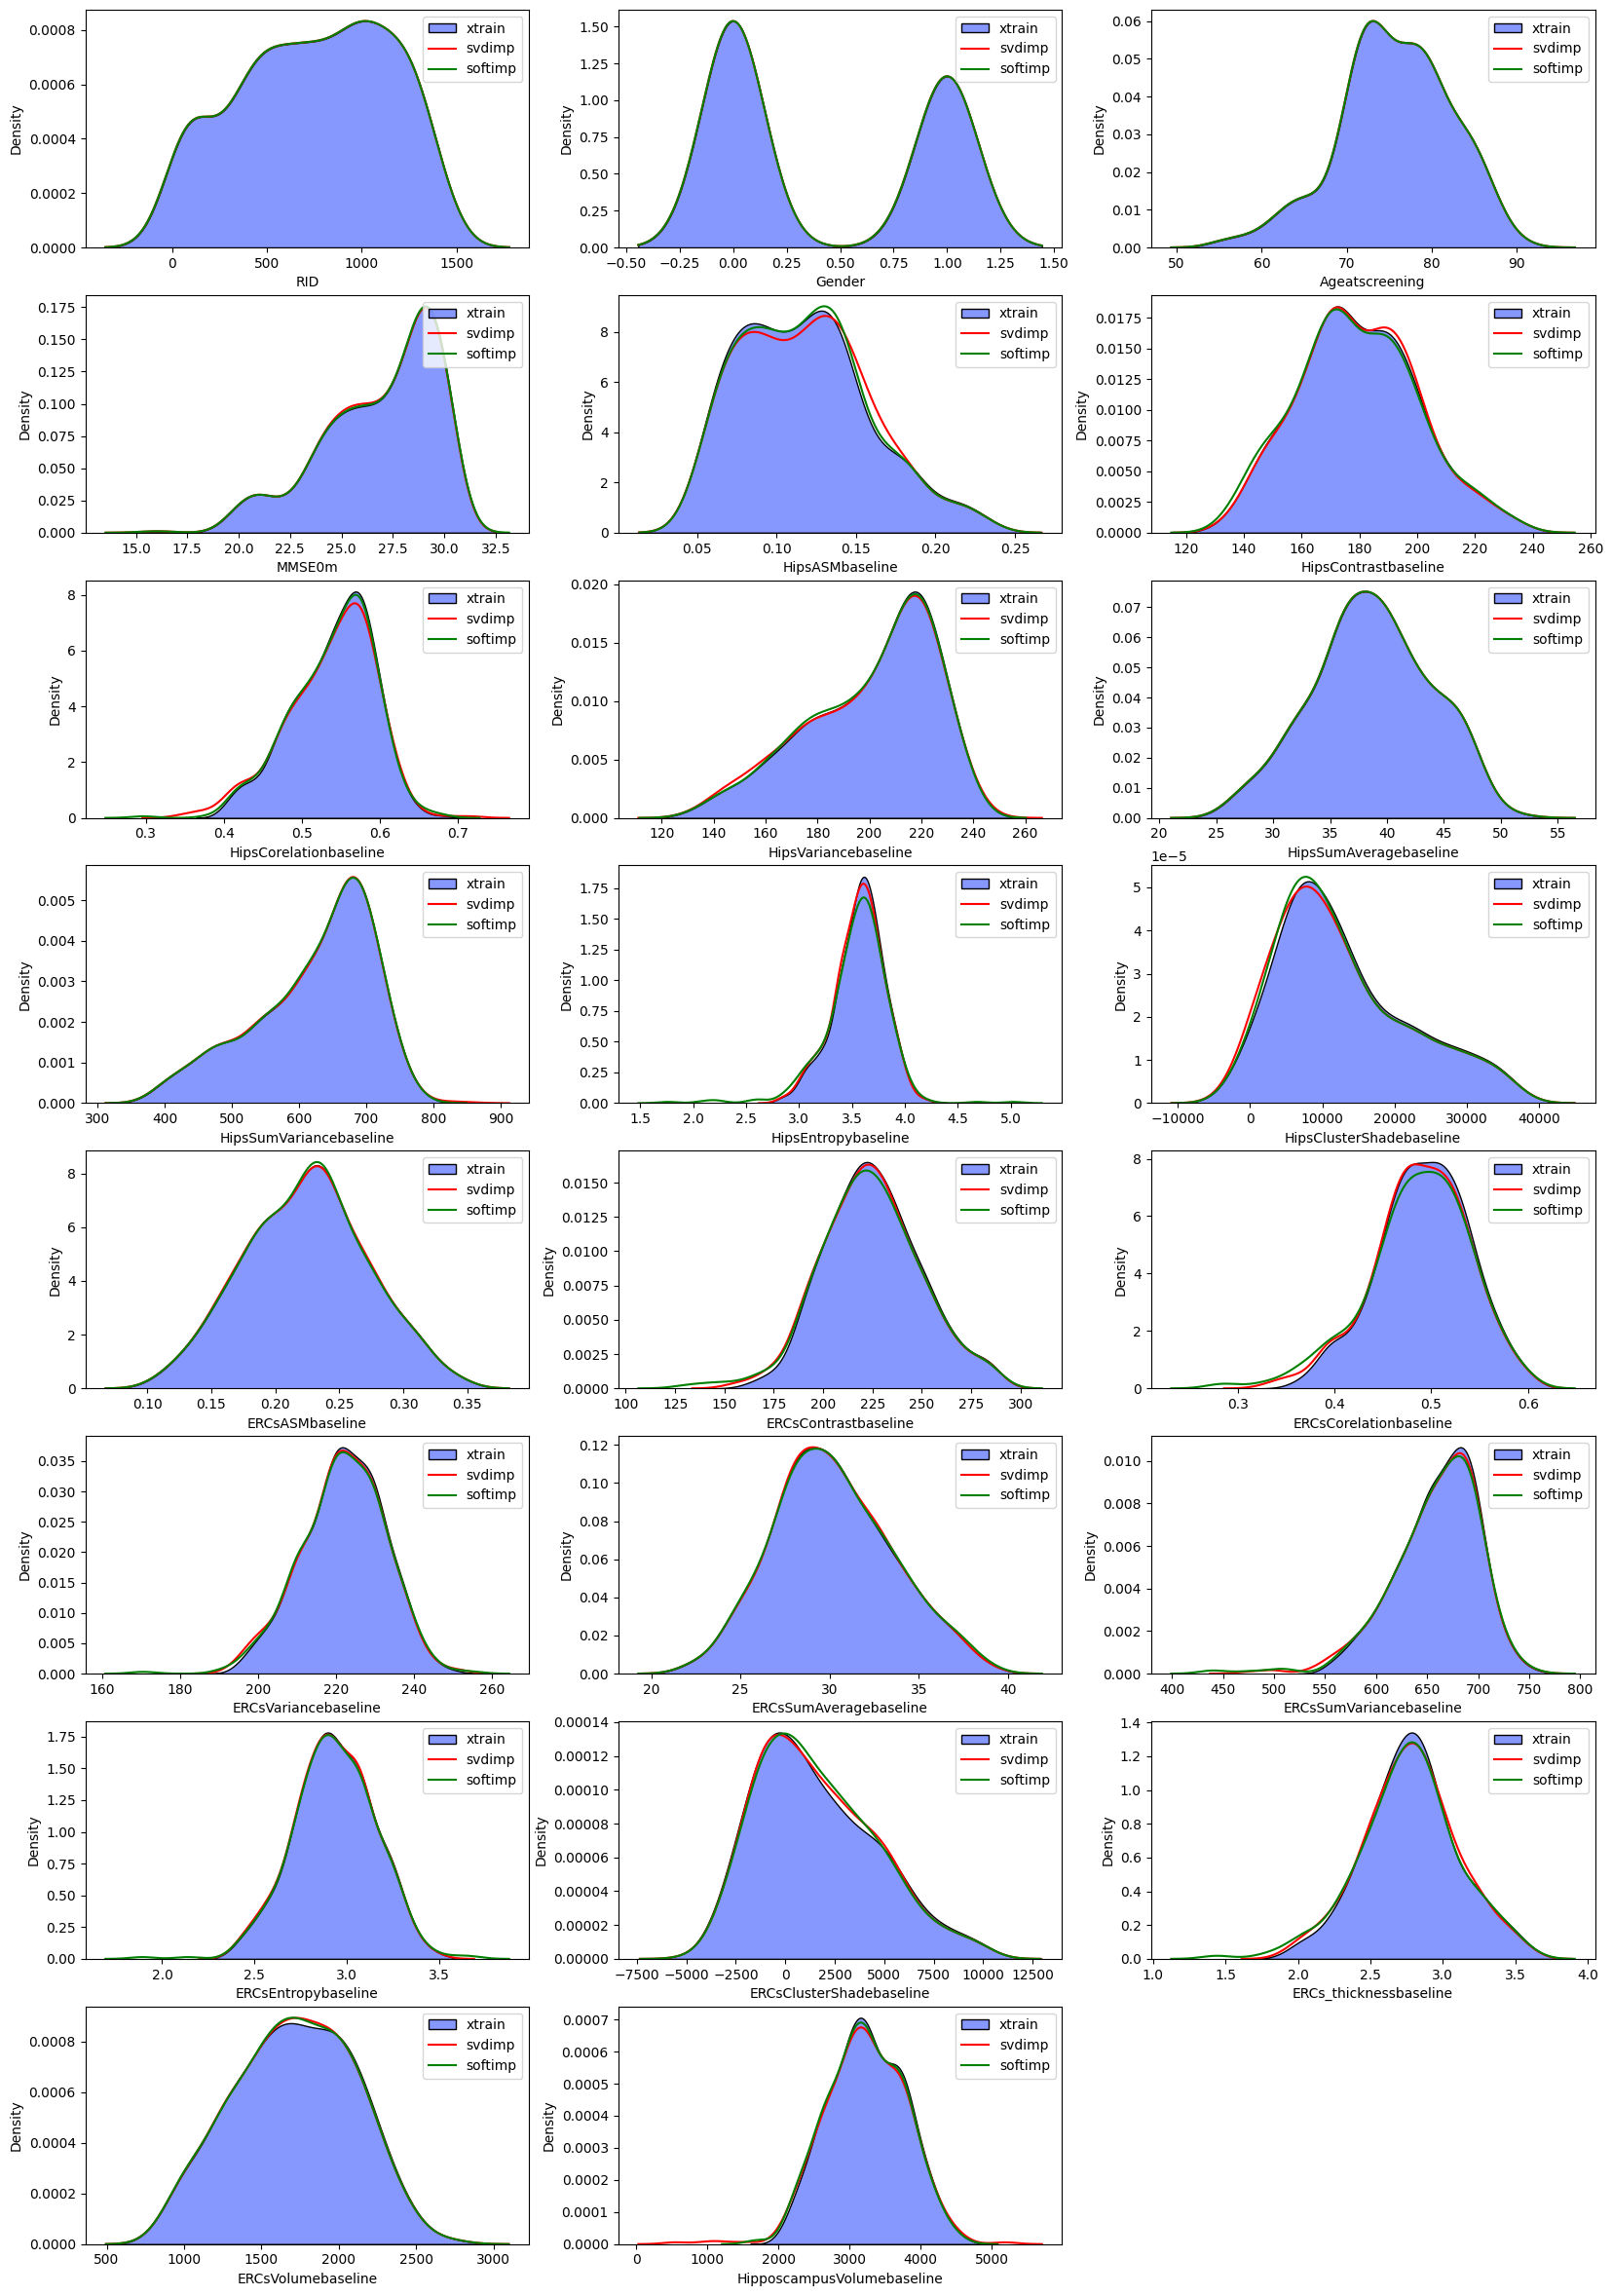

In [7]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train[X_train.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_imputed_svd[X_train_imputed_svd.columns[i]], color= "red")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_imputed_sm[X_train_imputed_sm.columns[i]], color= "green")
    
    labels = ['xtrain', 'svdimp', 'softimp']
    plt.legend(labels, loc='upper right')

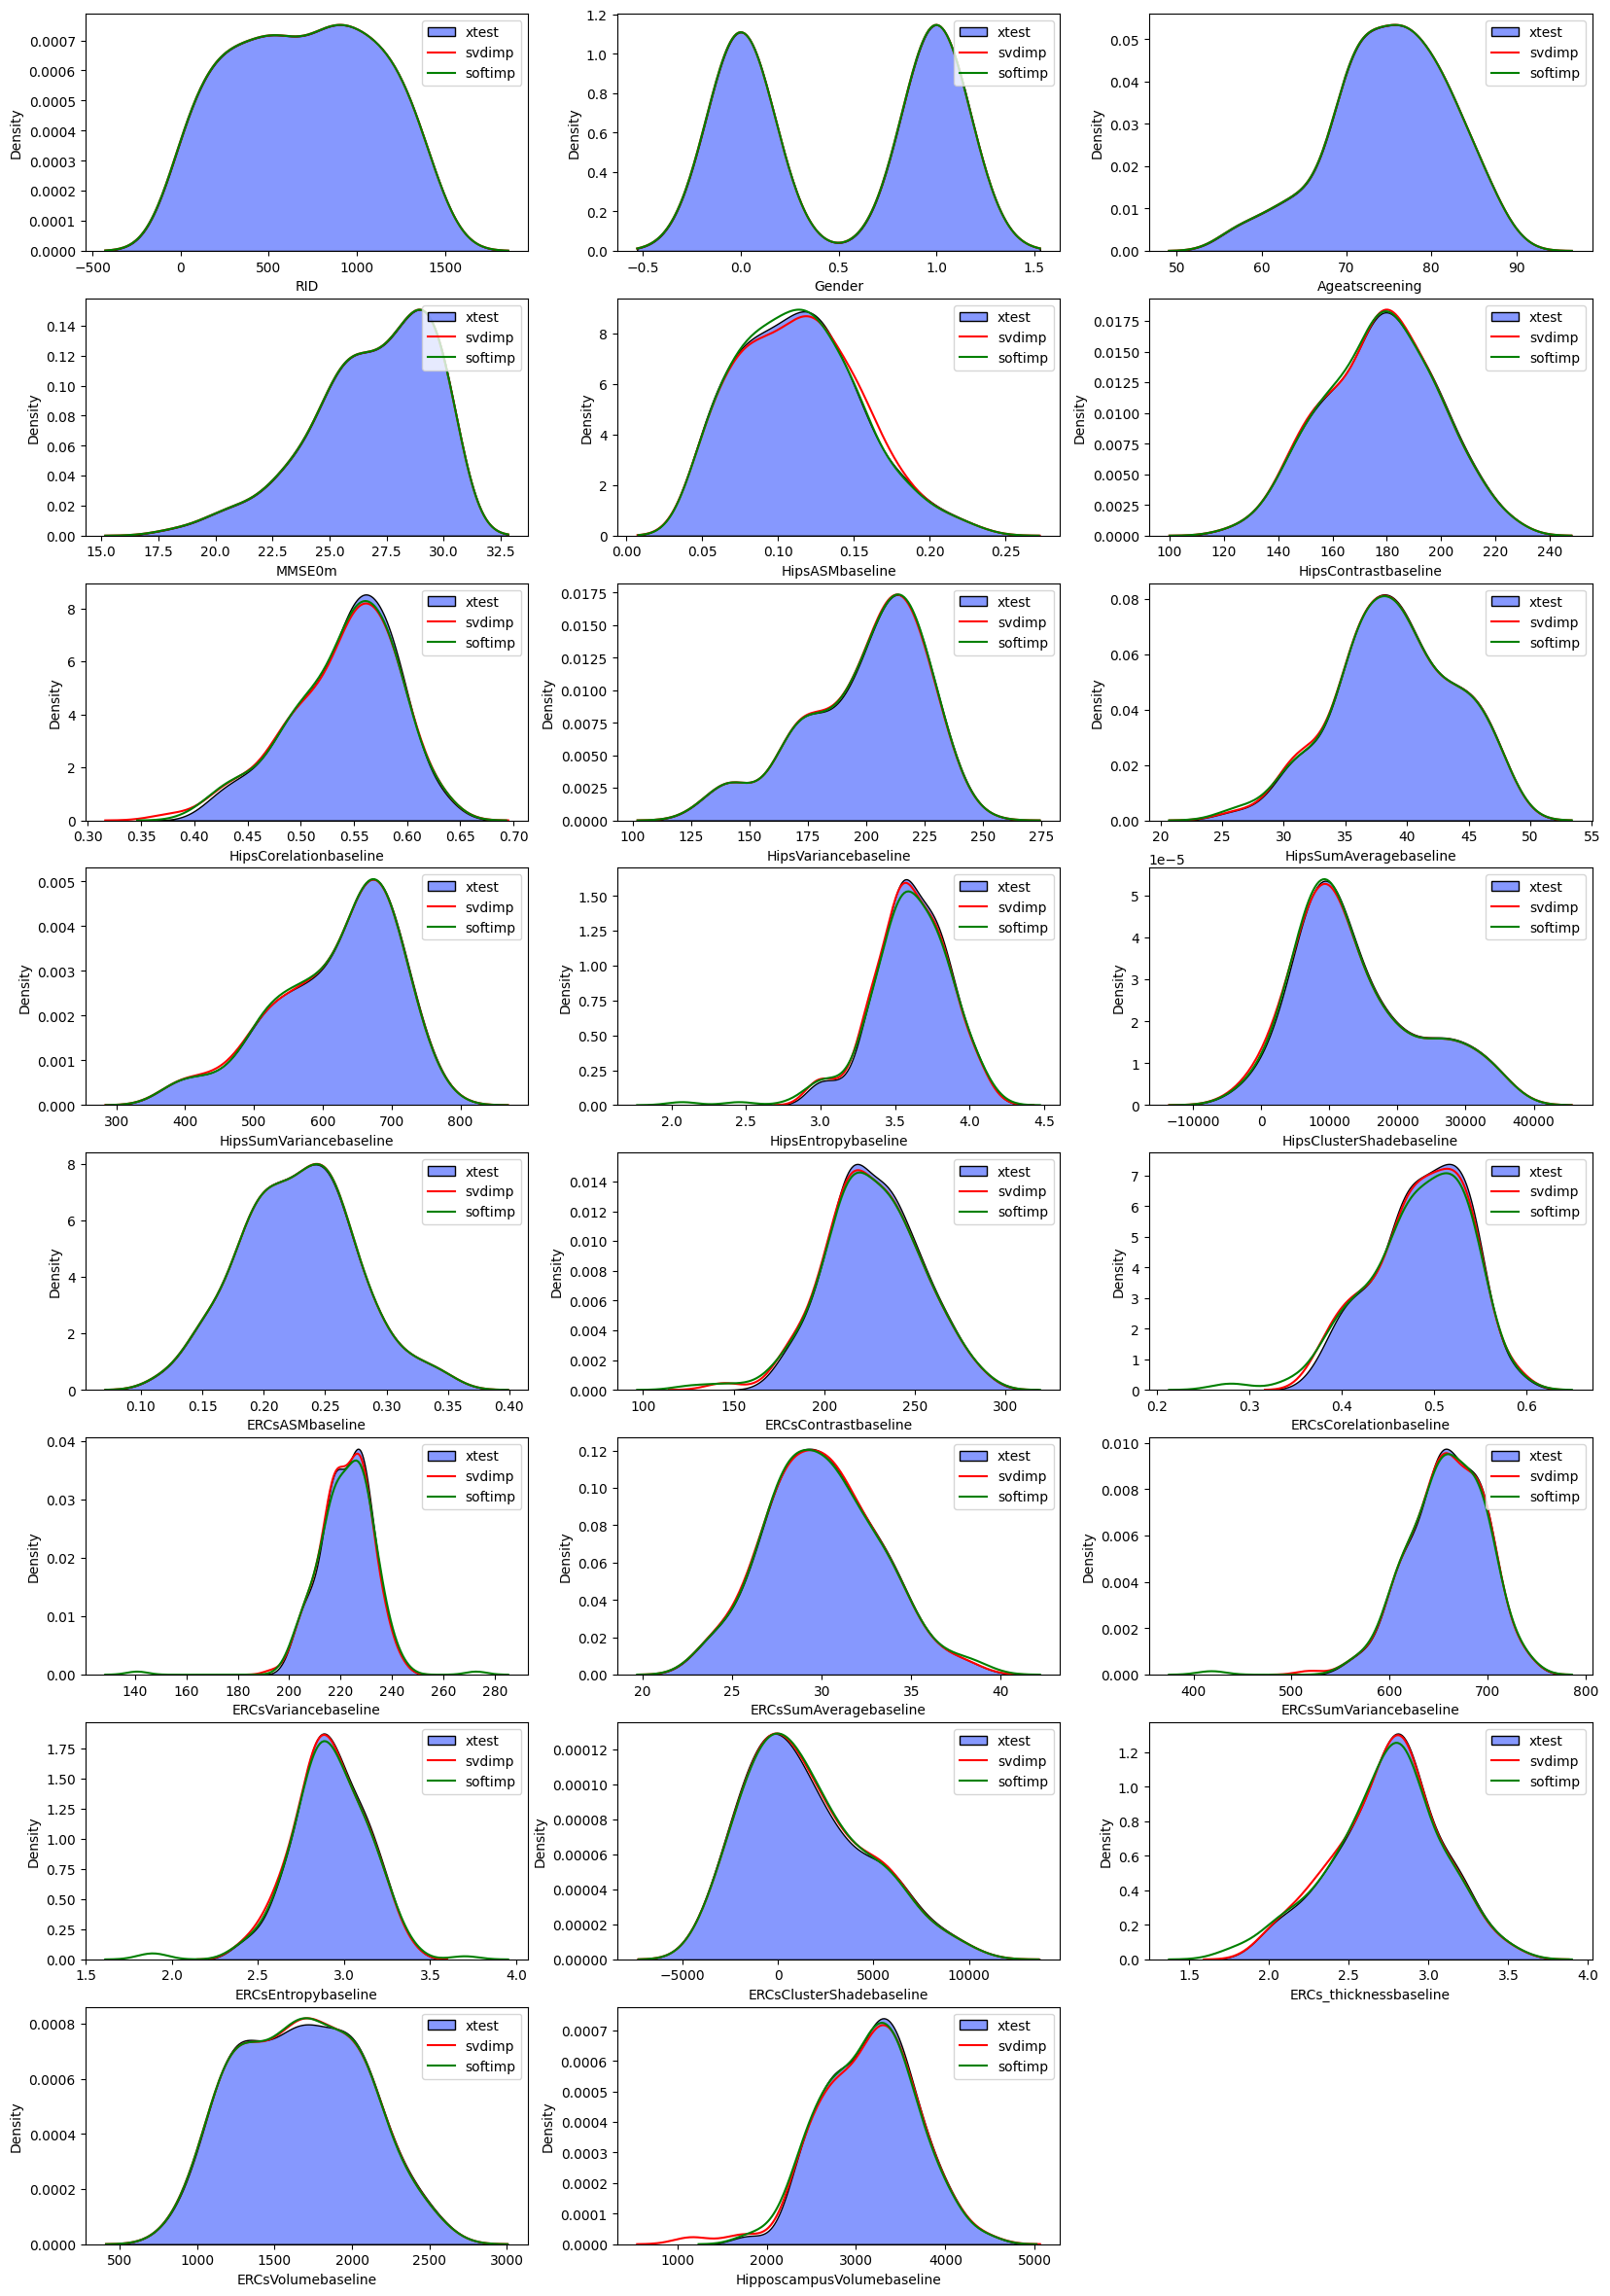

In [8]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_test.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test[X_test.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_imputed_svd[X_test_imputed_svd.columns[i]], color= "red")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_imputed_sm[X_test_imputed_sm.columns[i]], color= "green")
    
    labels = ['xtest', 'svdimp', 'softimp']
    plt.legend(labels, loc='upper right')

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score, make_scorer
import numpy as np

def run_random_forest(classifier, imp_method, X_train, y_train):

        # Initialize the Random Forest with class weight balancing
        rf = RandomForestClassifier(n_estimators=100,
                                    max_depth=5,
                                    random_state=42,
                                    class_weight="balanced",
        )
        
        kf = StratifiedKFold(n_splits=5,
                             shuffle=True,
                             random_state=42,
        )
        
        metrics = {"accuracy": make_scorer(accuracy_score),
                   "balanced_accuracy": make_scorer(balanced_accuracy_score),  
                   "precision": make_scorer(precision_score, average="weighted"), 
                   "recall": make_scorer(recall_score, average="weighted"), 
                   "f1_weighted": make_scorer(f1_score, average="weighted"),
                   "roc_auc_ovr_weighted": make_scorer(roc_auc_score, 
                                                       average="weighted", 
                                                       multi_class="ovr", 
                                                       response_method="predict_proba",),
        }
        
        cross_val_results = cross_validate(rf,
                                           X_train,
                                           y_train,
                                           cv=kf,
                                           scoring=metrics,
                                           return_train_score=True,
        )
                
        metric_names = list(metrics.keys())
        mean_train = [np.mean(cross_val_results[f"train_{metric}"]) for metric in metric_names]
        std_train = [np.std(cross_val_results[f"train_{metric}"]) for metric in metric_names]
        mean_test = [np.mean(cross_val_results[f"test_{metric}"]) for metric in metric_names]
        std_test = [np.std(cross_val_results[f"test_{metric}"]) for metric in metric_names]
                
        cv_metrics_df = pd.DataFrame({
                "Classifier": classifier,
                "Imputation": imp_method,
                "Metric": metric_names,
                "Mean Train": mean_train,
                "Std Train": std_train,
                "Mean Test": mean_test,
                "Std Test": std_test,
        })
        
        fit_model = rf.fit(X_train, y_train)
        
        return fit_model, cv_metrics_df


In [10]:
svd_model, svd_metrics = run_random_forest("Random Forest", "IterSVD", X_train_imputed_svd, y_train)
soft_model, soft_metrics = run_random_forest("Random Forest", "SoftImpute", X_train_imputed_soft, y_train)

In [11]:
validation_df = pd.concat([svd_metrics, soft_metrics])
validation_df.set_index(["Classifier", "Imputation", "Metric"])

Mean Train  Std Train  \
Classifier    Imputation Metric                                        
Random Forest IterSVD    accuracy                0.907059   0.009594   
                         balanced_accuracy       0.913824   0.008444   
                         precision               0.911394   0.008200   
                         recall                  0.907059   0.009594   
                         f1_weighted             0.904995   0.010293   
                         roc_auc_ovr_weighted    0.985576   0.001545   
              SoftImpute accuracy                0.906471   0.009189   
                         balanced_accuracy       0.912206   0.010782   
                         precision               0.910586   0.007983   
                         recall                  0.906471   0.009189   
                         f1_weighted             0.904769   0.009466   
                         roc_auc_ovr_weighted    0.985029   0.001844   

                                               Mean Test  Std Test  
Classifier    Imputation Metric                                     
Random Forest IterSVD    accuracy               0.637647  0.020241  
                         balanced_accuracy      0.565090  0.017696  
                         precision              0.621000  0.007792  
                         recall                 0.637647  0.020241  
                         f1_weighted            0.617409  0.015075  
                         roc_auc_ovr_weighted   0.830632  0.027998  
              SoftImpute accuracy               0.621176  0.029199  
                         balanced_accuracy      0.554856  0.021177  
                         precision              0.603388  0.034837  
                         recall                 0.621176  0.029199  
                         f1_weighted            0.601615  0.031322  
                         roc_auc_ovr_weighted   0.829706  0.018460

In [12]:
def eval_random_forest(classifier, imp_method, X_train, X_test, y_train, y_test):
     
        # Get predicted probabilities for ROC AUC
        pred_train_proba = imp_method.predict_proba(X_train)
        pred_test_proba = imp_method.predict_proba(X_test)
        
        # Get predicted accuracy values
        pred_train = imp_method.predict(X_train)
        pred_test = imp_method.predict(X_test)
        
        # Calculate metrics
        metrics_train = {
                "Accuracy": accuracy_score(y_train, pred_train),
                "Balanced Accuracy": balanced_accuracy_score(y_train, pred_train),
                "Precision": precision_score(y_train, pred_train, average="weighted"),
                "Recall": recall_score(y_train, pred_train, average="weighted"),
                "F1-Score": f1_score(y_train, pred_train, average="weighted"),
                "ROC-AUC": roc_auc_score(y_train, pred_train_proba, average="weighted", multi_class="ovr"),
        }
        
        metrics_test = {
                "Accuracy": accuracy_score(y_test, pred_test),
                "Balanced Accuracy": balanced_accuracy_score(y_test, pred_test),
                "Precision": precision_score(y_test, pred_test, average="weighted"),
                "Recall": recall_score(y_test, pred_test, average="weighted"),
                "F1-Score": f1_score(y_test, pred_test, average="weighted"),
                "ROC-AUC": roc_auc_score(y_test, pred_test_proba, average="weighted", multi_class="ovr"),
        }
                
        pred_metrics_df = pd.DataFrame({"Metric":metrics_train.keys(),
                                   "Train data": metrics_train.values(),
                                   "Test data": metrics_test.values()
                }
        )
        
        return pred_metrics_df

In [13]:
pred_svd = eval_random_forest(svd_model, X_train_imputed_svd, X_test_imputed_svd, y_train, y_test)
pred_soft = eval_random_forest(soft_model, X_train_imputed_soft, X_test_imputed_soft, y_train, y_test)

TypeError: eval_random_forest() missing 1 required positional argument: 'y_test'

In [203]:
prediction_df = pd.concat([pred_svd, pred_soft])
prediction_df

,Metric,Train data,Test data
0,Accuracy,0.877647,0.557377
1,Balanced Accuracy,0.885555,0.568052
2,Precision,0.881615,0.549233
3,Recall,0.877647,0.557377
4,F1-Score,0.874653,0.543307
5,ROC-AUC,0.979191,0.810447
0,Accuracy,0.889412,0.546448
1,Balanced Accuracy,0.896625,0.560239
2,Precision,0.894290,0.533777
3,Recall,0.889412,0.546448
